In [1]:
import os
import numpy as np
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111']
num_iter=11
isi_um=np.zeros((4,4,11))
isi_ummm=np.zeros((4,4,11))
aux_um=np.zeros((4,4,11))
aux_ummm=np.zeros((4,4,11))

for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um.mat"))
    isi_um[i,i,:] = np.squeeze(data['isi_um'])
    a = np.squeeze(data['aux_um'][1,:])
    aux_um[i,i,:] = np.array([a[i][0][0] for i in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_um_scoff.mat"))
    # aux_um[i,i,:] = np.squeeze(data['loss'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm.mat"))
    isi_ummm[i,i,:] = np.squeeze(data['isi_ummm'])
    a = np.squeeze(data['aux_ummm'][1,:])
    aux_ummm[i,i,:] = np.array([a[i][0][0] for i in range(num_iter)])
    # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","loss_ummm_scoff.mat"))
    # aux_ummm[i,i,:] = np.squeeze(data['loss'])
    
    incorrect_ss_list = list(range(4))
    incorrect_ss_list.remove(i)
    for j in incorrect_ss_list:
        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","um.mat"))
        isi_um[i,j,:] = np.squeeze(data['isi_um_s1'])
        a = np.squeeze(data['aux_um_s1'][1,:])
        aux_um[i,j,:] = np.array([a[i][0][0] for i in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_um_scoff.mat"))
        # aux_um[i,j,:] = np.squeeze(data['loss'])

        data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","ummm.mat"))
        isi_ummm[i,j,:] = np.squeeze(data['isi_ummm_s1'])
        a = np.squeeze(data['aux_ummm_s1'][1,:])
        aux_ummm[i,j,:] = np.array([a[i][0][0] for i in range(num_iter)])
        # data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}_incorrect{subspace_struct_list[j]}","loss_ummm_scoff.mat"))
        # aux_ummm[i,j,:] = np.squeeze(data['loss'])

In [4]:
isi_um_min = np.min(isi_um,axis=2)
isi_ummm_min = np.min(isi_ummm,axis=2)

isi_um_min_ind = np.argmin(isi_um,axis=2)
isi_ummm_min_ind = np.argmin(isi_ummm,axis=2)

aux_um_min = np.min(aux_um,axis=2)
aux_ummm_min = np.min(aux_ummm,axis=2)

aux_um_min_ind = np.argmin(aux_um,axis=2)
aux_ummm_min_ind = np.argmin(aux_ummm,axis=2)

In [5]:
# use loss to grab ISI
isi_um_min_loss = np.zeros((4,4))
isi_ummm_min_loss = np.zeros((4,4))

for i in range(4):
    for j in range(4):
        isi_um_min_loss[i,j] = isi_um[i,j,aux_um_min_ind[i,j]]
        isi_ummm_min_loss[i,j] = isi_ummm[i,j,aux_ummm_min_ind[i,j]]

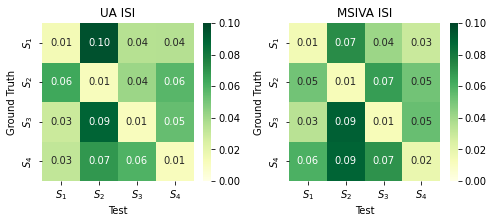

In [6]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))

sns.heatmap(isi_um_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA ISI")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(isi_ummm_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA ISI")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_isi.pdf")
# plt.savefig("simulation_isi.png",dpi=200)

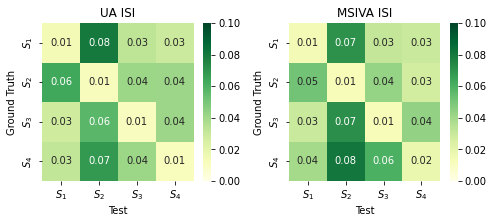

In [30]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))

sns.heatmap(isi_um_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA ISI")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(isi_ummm_min,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA ISI")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation.pdf")
# plt.savefig("simulation.png",dpi=200)

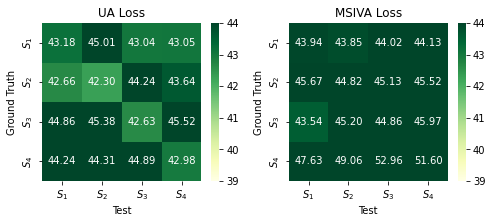

In [14]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))
# viridis_r
sns.heatmap(aux_um_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA Loss")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(aux_ummm_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA Loss")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation.pdf")
# plt.savefig("simulation_loss.png",dpi=200)

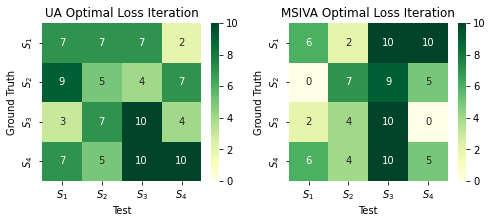

In [54]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(1,2,figsize=(7,3.2))
# viridis_r
sns.heatmap(aux_um_min_ind,cmap="YlGn",annot=True,vmin=0,vmax=10,xticklabels=label,yticklabels=label,ax=axes[0])
axes[0].set_title("UA Optimal Loss Iteration")
axes[0].set_ylabel("Ground Truth")
axes[0].set_xlabel("Test")

sns.heatmap(aux_ummm_min_ind,cmap="YlGn",annot=True,vmin=0,vmax=10,xticklabels=label,yticklabels=label,ax=axes[1])
axes[1].set_title("MSIVA Optimal Loss Iteration")
axes[1].set_ylabel("Ground Truth")
axes[1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_opt_iter.pdf")
# plt.savefig("simulation_opt_iter.png",dpi=200)

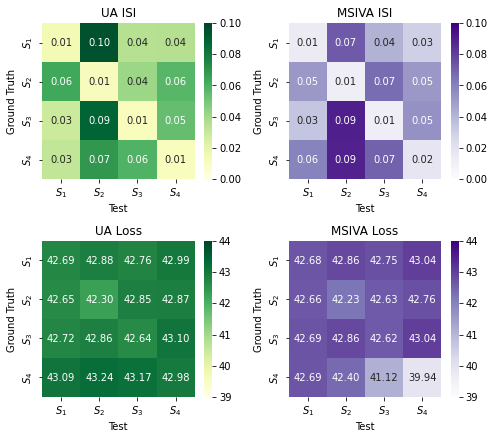

In [29]:
label=["$S_1$","$S_2$","$S_3$","$S_4$"]
fig,axes=plt.subplots(2,2,figsize=(7,6.2))
# viridis_r
sns.heatmap(isi_um_min_loss,cmap="YlGn",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0,0])
axes[0,0].set_title("UA ISI")
axes[0,0].set_ylabel("Ground Truth")
axes[0,0].set_xlabel("Test")

sns.heatmap(isi_ummm_min_loss,cmap="Purples",annot=True,fmt=".2f",vmin=0,vmax=0.1,xticklabels=label,yticklabels=label,ax=axes[0,1])
axes[0,1].set_title("MSIVA ISI")
axes[0,1].set_ylabel("Ground Truth")
axes[0,1].set_xlabel("Test")

# viridis_r
sns.heatmap(aux_um_min,cmap="YlGn",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1,0])
axes[1,0].set_title("UA Loss")
axes[1,0].set_ylabel("Ground Truth")
axes[1,0].set_xlabel("Test")

sns.heatmap(aux_ummm_min,cmap="Purples",annot=True,vmin=39,vmax=44,fmt=".2f",xticklabels=label,yticklabels=label,ax=axes[1,1])
axes[1,1].set_title("MSIVA Loss")
axes[1,1].set_ylabel("Ground Truth")
axes[1,1].set_xlabel("Test")

plt.tight_layout()
# plt.savefig("simulation_isi_loss.pdf")
# plt.savefig("simulation.png",dpi=200)

In [10]:
datapath="/Users/xli77/Documents/MISA/results/SIVA/fixedSubspace/um2mm/"
subspace_struct_list=['234111','2222211','333111','441111']

corr = np.zeros((4,4,12,12))
for i,ss in enumerate(subspace_struct_list):
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","A.mat"))
    A=np.squeeze(data['A'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","um_W.mat"))
    W1=np.squeeze(data['W1'])
    
    data=sio.loadmat(os.path.join(datapath,f"subspace_struct_{ss}","ummm_W.mat"))
    W2=np.squeeze(data['W2'])
    
    corr[i,0] = W1[0]@A[0]
    corr[i,1] = W1[1]@A[1]
    corr[i,2] = W2[0]@A[0]
    corr[i,3] = W2[1]@A[1]

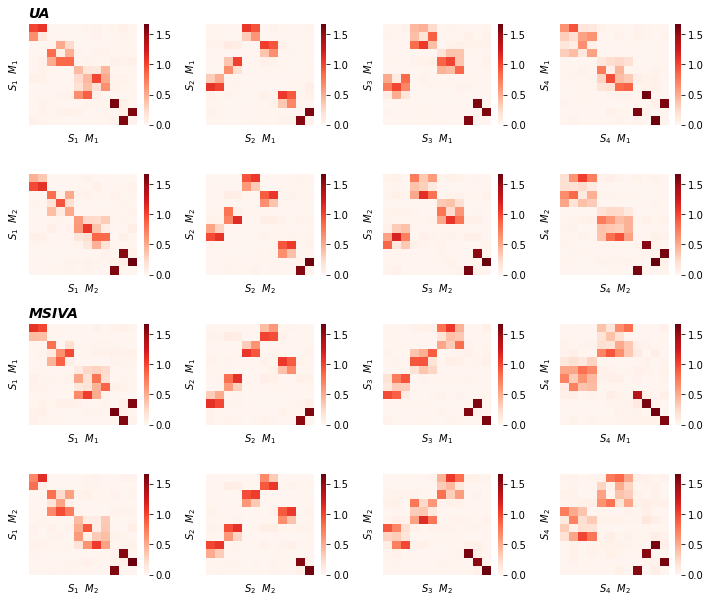

In [16]:
# cmap_list=["YlGn","YlGn","Purples","Purples"]
corrabsmax = np.max(np.abs(corr))
analysis_list = ["UA"]*2+["MSIVA"]*2
fig,axes=plt.subplots(4,4,figsize=(10,2.12*4))
for i in range(4):
    for j in range(4):
        sns.heatmap(np.abs(corr[i,j]),cmap="Reds",vmin=0,vmax=corrabsmax,ax=axes[j,i]) #Purples
        # sns.heatmap(corr[i,j],cmap="coolwarm",vmin=-corrabsmax,vmax=corrabsmax,ax=axes[j,i])
        # axes[j,i].set_title(f"{analysis_list[j]}  $S_{i+1}$  $M_{j%2+1}$")#self-correlation($Y$)
        # axes[j,i].set_axis_off()
        axes[j,i].set_xlabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_ylabel(f"$S_{i+1}$  $M_{j%2+1}$")
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i == 0 and j == 0:
            axes[j,i].set_title("UA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")
        if i == 0 and j == 2:
            axes[j,i].set_title("MSIVA", loc="left", fontsize=14, fontstyle="italic", fontweight="bold")

plt.tight_layout()
# plt.savefig("simulation_absWA_red.png",dpi=300)
# plt.savefig("simulation_absWA_red.pdf")